1)
โหลด csv เข้าไปใน Python Pandas
จาก (https://www.kaggle.com/mansoordaku/ckdisease)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kidney_disease.csv')

2) เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว

In [3]:

df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [4]:
df.tail(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
390,390,52.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,99.0,25.0,0.8,135.0,3.7,15.0,52,6300,5.3,no,no,no,good,no,no,notckd
391,391,36.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,85.0,16.0,1.1,142.0,4.1,15.6,44,5800,6.3,no,no,no,good,no,no,notckd
392,392,57.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,133.0,48.0,1.2,147.0,4.3,14.8,46,6600,5.5,no,no,no,good,no,no,notckd
393,393,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,117.0,45.0,0.7,141.0,4.4,13.0,54,7400,5.4,no,no,no,good,no,no,notckd
394,394,50.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,137.0,46.0,0.8,139.0,5.0,14.1,45,9500,4.6,no,no,no,good,no,no,notckd
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,18.0,1.1,141.0,3.5,15.8,53,6800,6.1,no,no,no,good,no,no,notckd


In [5]:
df.sample(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
94,94,65.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,93.0,66.0,1.6,137.0,4.5,11.6,36,11900,3.9,no,yes,no,good,no,no,ckd
325,325,58.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,50.0,1.2,140.0,3.5,14.0,50,6700,6.5,no,no,no,good,no,no,notckd
216,216,64.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,107.0,15.0,NaN,NaN,NaN,12.8,38,NaN,NaN,no,no,no,good,no,no,ckd
239,239,34.0,90.0,1.015,2.0,0.0,normal,normal,notpresent,notpresent,104.0,50.0,1.6,137.0,4.1,11.9,39,NaN,NaN,no,no,no,good,no,no,ckd
313,313,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,104.0,28.0,0.9,142.0,4.8,17.3,52,8200,4.8,no,no,no,good,no,no,notckd
257,257,38.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,91.0,36.0,0.7,135.0,3.7,14.0,46,9100,5.8,no,no,no,good,no,no,notckd
141,141,67.0,70.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,NaN,106.0,6.0,137.0,4.9,6.1,19,6500,NaN,yes,no,no,good,no,yes,ckd
237,237,80.0,70.0,1.015,2.0,2.0,NaN,normal,notpresent,notpresent,141.0,53.0,2.2,NaN,NaN,12.7,40,9600,NaN,yes,yes,no,poor,yes,no,ckd
235,235,45.0,70.0,1.010,2.0,0.0,NaN,normal,notpresent,notpresent,113.0,93.0,2.3,NaN,NaN,7.9,26,5700,NaN,no,no,yes,good,no,yes,ckd
111,111,65.0,80.0,1.010,3.0,3.0,NaN,normal,notpresent,notpresent,294.0,71.0,4.4,128.0,5.4,10.0,32,9000,3.9,yes,yes,yes,good,no,no,ckd


3)
เช็คว่ามีข้อมูลที่หายไปไหม สามารถจัดการได้ตามความเหมาะสม

In [6]:
# errors='coerce' คือ invalid parsing (ในที่นี้คือ '\t?') will be set as NaN
df['pcv'] = pd.to_numeric(df['pcv'],errors='coerce')
df['wc'] = pd.to_numeric(df['wc'],errors='coerce')
df['rc'] = pd.to_numeric(df['rc'],errors='coerce')

In [7]:
df['classification'][(df['classification']!='ckd')&(df['classification']!='notckd')]

37     ckd\t
230    ckd\t
Name: classification, dtype: object

In [8]:
# แก้ค่าตำแหน่ง 37, 230 ให้ถูกต้อง
df.loc[[37,230],'classification']='ckd'

In [9]:
df['cad'][(df['cad']!='yes')&(df['cad']!='no')]

40     \tno
64     \tno
288     NaN
297     NaN
Name: cad, dtype: object

In [10]:
# แก้ค่าตำแหน่ง 40, 64 ให้ถูกต้อง
df.loc[[40,64],'cad']='no'

In [11]:
df['dm'][(df['dm']!='yes')&(df['dm']!='no')]

30       yes
65      \tno
88     \tyes
138     \tno
188     \tno
194    \tyes
288      NaN
297      NaN
Name: dm, dtype: object

In [12]:
# แก้ค่าตำแหน่ง 30, 65, 88, 138, 188, 194 ให้ถูกต้อง
df.loc[[65,138,188],'dm']='no'
df.loc[[30,88,194],'dm']='yes'

In [13]:
df.loc[[297,298],'dm']

297    NaN
298     no
Name: dm, dtype: object

4) ใช้ info และ describe อธิบายข้อมูลเบื้องต้น

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [15]:
df.describe().style.format("{:.2f}")

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.00,391.00,388.00,353.00,354.00,351.00,356.00,381.00,383.00,313.00,312.00,348.00,329.00,294.00,269.00
mean,199.50,51.48,76.47,1.02,1.02,0.45,148.04,57.43,3.07,137.53,4.63,12.53,38.88,8406.12,4.71
std,115.61,17.17,13.68,0.01,1.35,1.10,79.28,50.50,5.74,10.41,3.19,2.91,8.99,2944.47,1.03
min,0.00,2.00,50.00,1.00,0.00,0.00,22.00,1.50,0.40,4.50,2.50,3.10,9.00,2200.00,2.10
25%,99.75,42.00,70.00,1.01,0.00,0.00,99.00,27.00,0.90,135.00,3.80,10.30,32.00,6500.00,3.90
50%,199.50,55.00,80.00,1.02,0.00,0.00,121.00,42.00,1.30,138.00,4.40,12.65,40.00,8000.00,4.80
75%,299.25,64.50,80.00,1.02,2.00,0.00,163.00,66.00,2.80,142.00,4.90,15.00,45.00,9800.00,5.40
max,399.00,90.00,180.00,1.02,5.00,5.00,490.00,391.00,76.00,163.00,47.00,17.80,54.00,26400.00,8.00


5)
ใช้ pairplot ดูความสัมพันธ์เบื้องต้น

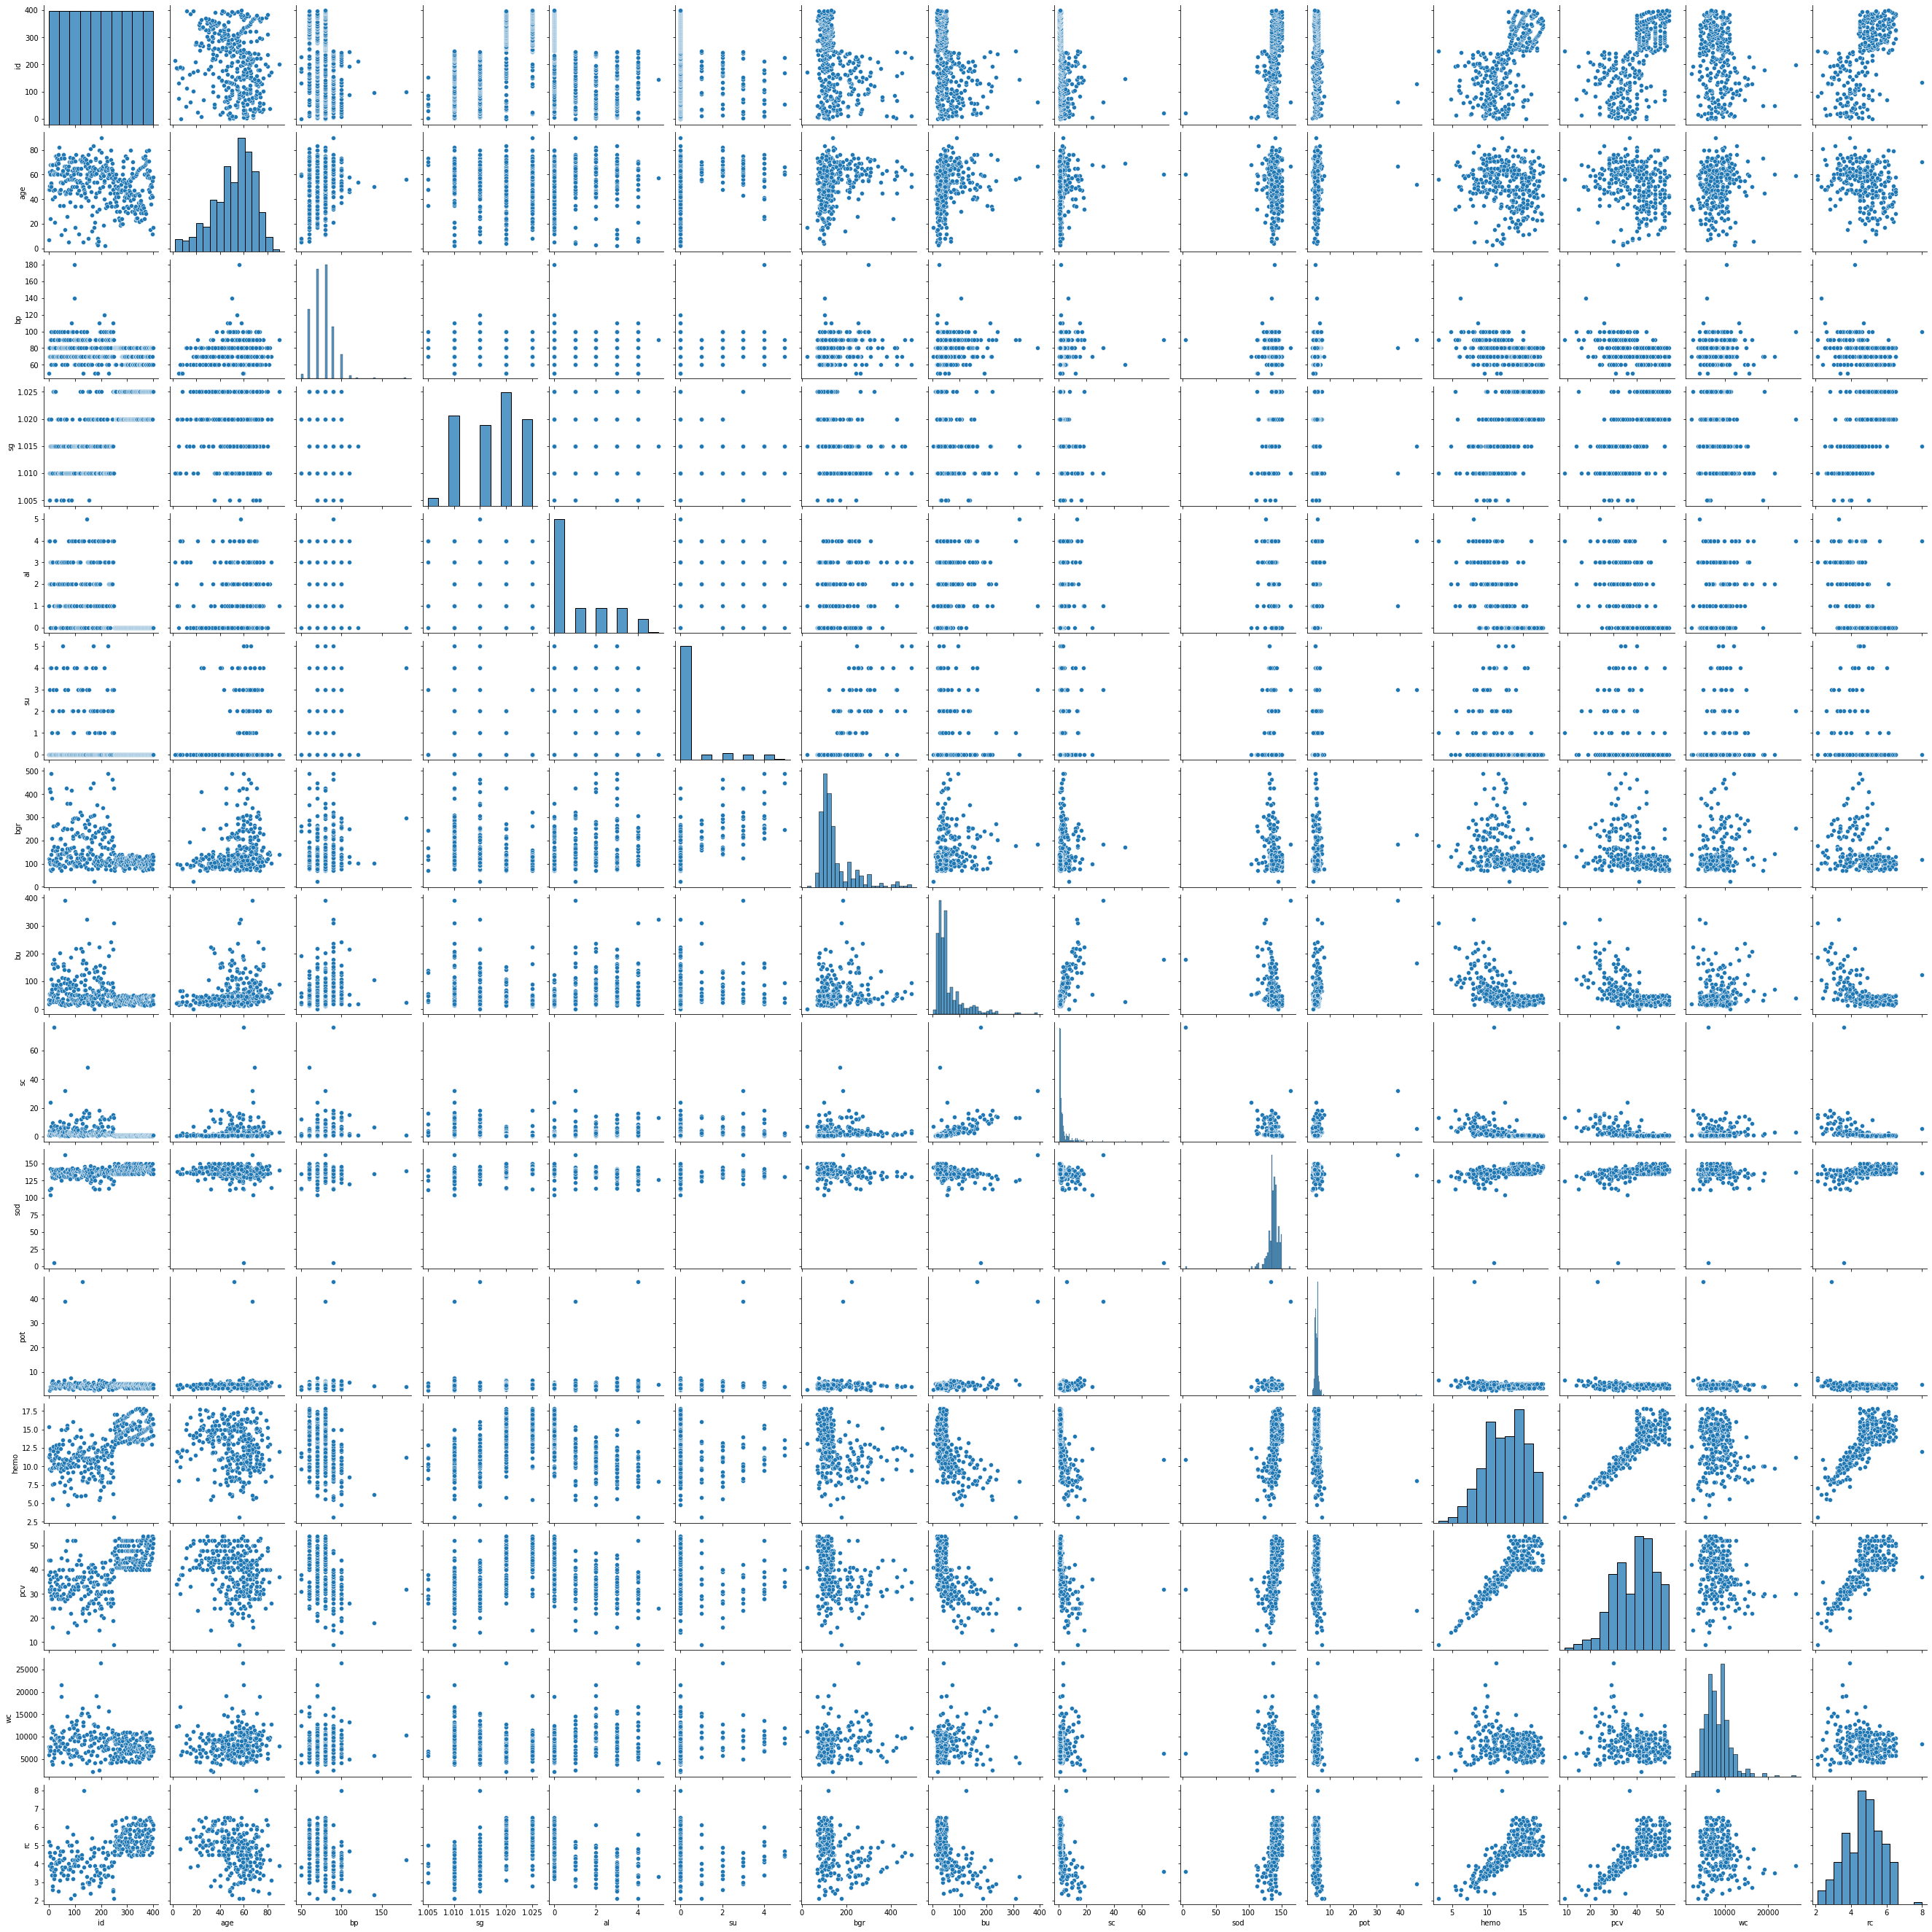

In [16]:
sns.pairplot(df)

6)
ใช้ displot เพื่อดูการกระจายของแต่ละคอลัมน์

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/loca

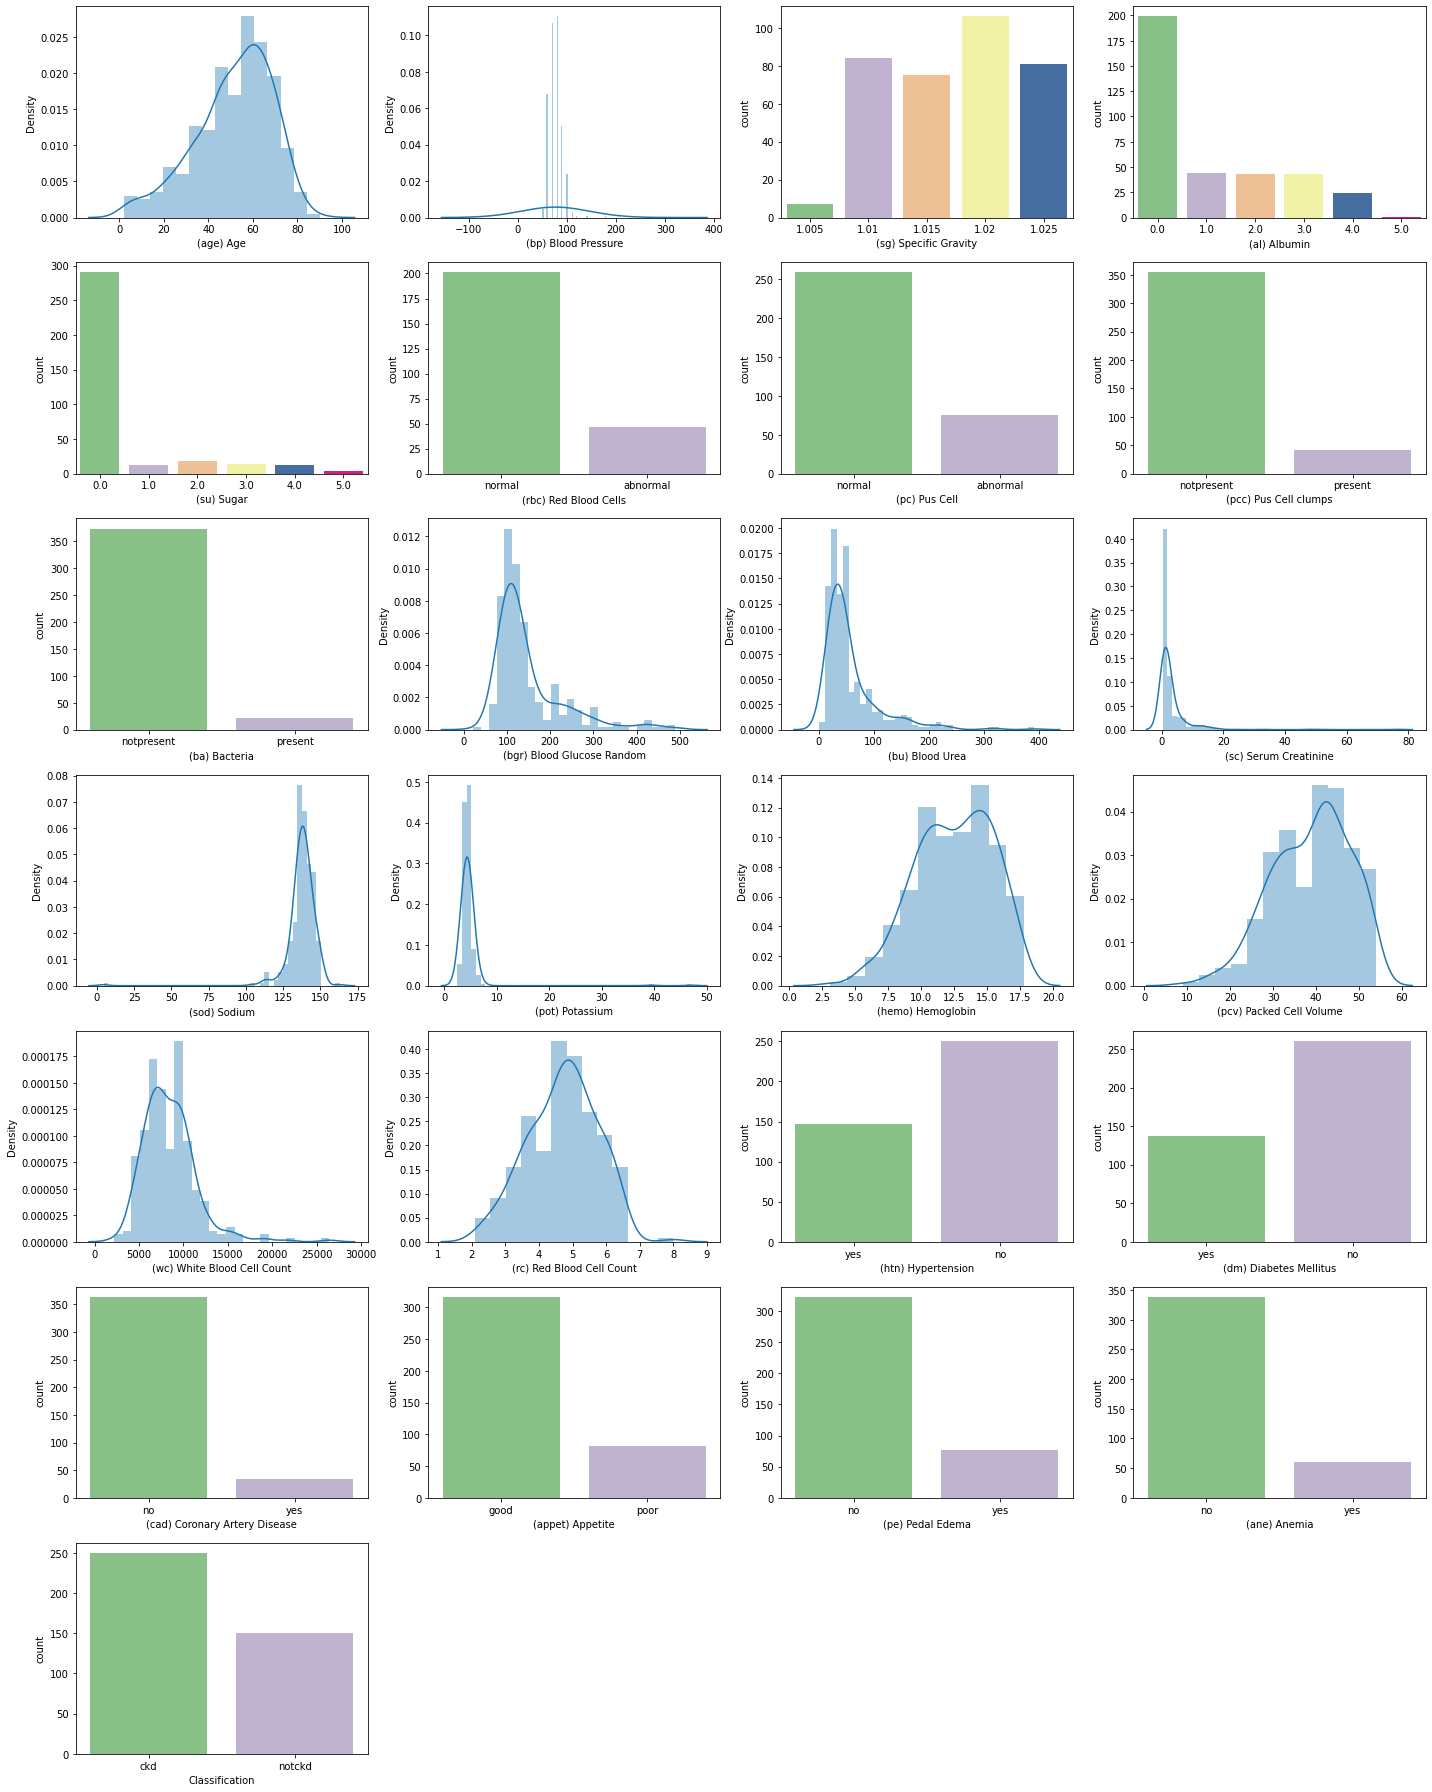

In [17]:
fig = plt.figure(figsize=(20,25))

# fig row 1
plt.subplot(741);sns.distplot(df['age'], axlabel='(age) Age')
plt.subplot(742);sns.distplot(df['bp'], axlabel='(bp) Blood Pressure', kde_kws={'bw':5})
plt.subplot(743);sns.countplot(x='sg', data=df, palette='Accent');plt.xlabel('(sg) Specific Gravity')
plt.subplot(744);sns.countplot(x='al', data=df, palette='Accent');plt.xlabel('(al) Albumin')

# fig row 2
plt.subplot(745);sns.countplot(x='su', data=df, palette='Accent');plt.xlabel('(su) Sugar')
plt.subplot(746);sns.countplot(x='rbc', data=df, palette='Accent');plt.xlabel('(rbc) Red Blood Cells')
plt.subplot(747);sns.countplot(x='pc', data=df, palette='Accent');plt.xlabel('(pc) Pus Cell')
plt.subplot(748);sns.countplot(x='pcc', data=df, palette='Accent');plt.xlabel('(pcc) Pus Cell clumps')

# fig row 3
plt.subplot(749);sns.countplot(x='ba', data=df, palette='Accent');plt.xlabel('(ba) Bacteria')
plt.subplot(7,4,10);sns.distplot(df['bgr'], axlabel='(bgr) Blood Glucose Random')
plt.subplot(7,4,11);sns.distplot(df['bu'], axlabel='(bu) Blood Urea')
plt.subplot(7,4,12);sns.distplot(df['sc'], axlabel='(sc) Serum Creatinine')

# fig row 4
plt.subplot(7,4,13);sns.distplot(df['sod'], axlabel='(sod) Sodium')
plt.subplot(7,4,14);sns.distplot(df['pot'], axlabel='(pot) Potassium')
plt.subplot(7,4,15);sns.distplot(df['hemo'], axlabel='(hemo) Hemoglobin')
plt.subplot(7,4,16);sns.distplot(df['pcv'], axlabel='(pcv) Packed Cell Volume')

# fig row 5
plt.subplot(7,4,17);sns.distplot(df['wc'], axlabel='(wc) White Blood Cell Count')
plt.subplot(7,4,18);sns.distplot(df['rc'], axlabel='(rc) Red Blood Cell Count')
plt.subplot(7,4,19);sns.countplot(x='htn', data=df, palette='Accent');plt.xlabel('(htn) Hypertension')
plt.subplot(7,4,20);sns.countplot(x='dm', data=df, palette='Accent');plt.xlabel('(dm) Diabetes Mellitus')

# fig row 6
plt.subplot(7,4,21);sns.countplot(x='cad', data=df, palette='Accent');plt.xlabel('(cad) Coronary Artery Disease')
plt.subplot(7,4,22);sns.countplot(x='appet', data=df, palette='Accent');plt.xlabel('(appet) Appetite')
plt.subplot(7,4,23);sns.countplot(x='pe', data=df, palette='Accent');plt.xlabel('(pe) Pedal Edema')
plt.subplot(7,4,24);sns.countplot(x='ane', data=df, palette='Accent');plt.xlabel('(ane) Anemia')

# fig row 7
plt.subplot(7,4,25);sns.countplot(x='classification', data=df, palette='Accent');plt.xlabel('Classification')

plt.tight_layout()
plt.show()

7)
ใช้ heatmap ดูความสัมพันธ์ของคอลัมน์ที่สนใจ

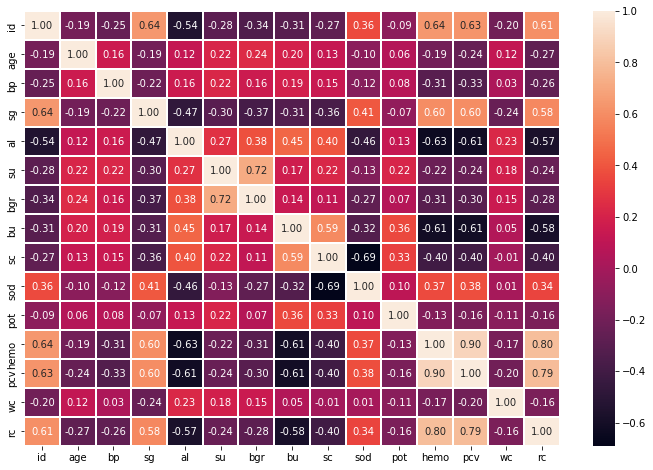

In [18]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linecolor='white',linewidth=1)

8)
สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation สูงสุด

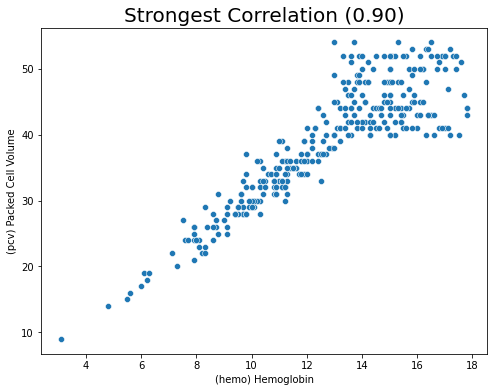

In [19]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x='hemo',y='pcv',data=df)
plt.title('Strongest Correlation (0.90)', fontsize=20)
plt.xlabel('(hemo) Hemoglobin')
plt.ylabel('(pcv) Packed Cell Volume')
plt.show()

9)
สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ต่ำสุด

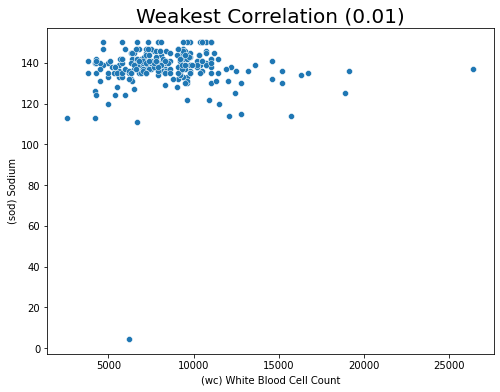

In [20]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x='wc',y='sod',data=df)
plt.title('Weakest Correlation (0.01)', fontsize=20)
plt.xlabel('(wc) White Blood Cell Count')
plt.ylabel('(sod) Sodium')
plt.show()

10)
สร้าง histogram ของ feature ต่างๆที่สนใจ

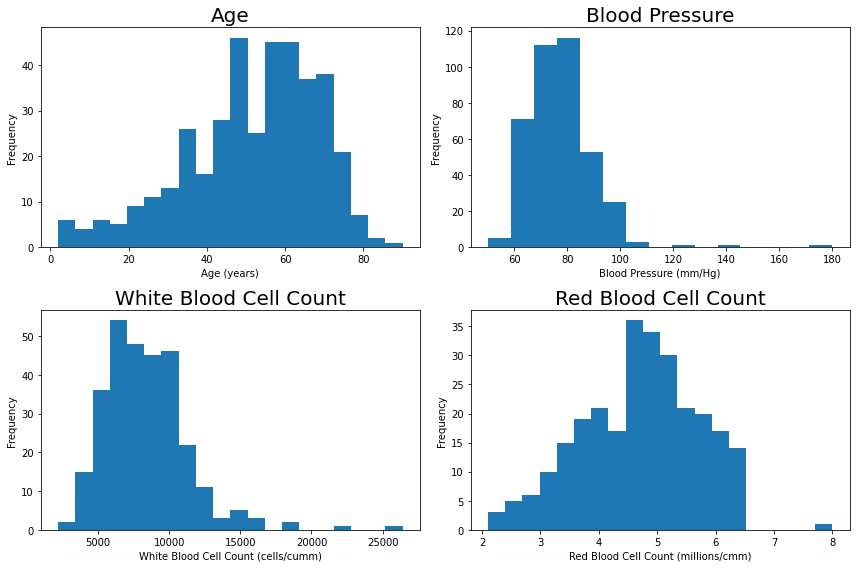

In [21]:
fig = plt.figure(figsize=(12,8))

plt.subplot(221)
plt.hist(df['age'],bins=20)
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Age', fontsize=20)
#plt.ticklabel_format(style='plain')

plt.subplot(222)
plt.hist(df['bp'],bins=15)
plt.xlabel('Blood Pressure (mm/Hg)')
plt.ylabel('Frequency')
plt.title('Blood Pressure', fontsize=20)

plt.subplot(223)
plt.hist(df['wc'],bins=20)
plt.xlabel('White Blood Cell Count (cells/cumm)')
plt.ylabel('Frequency')
plt.title('White Blood Cell Count', fontsize=20)

plt.subplot(224)
plt.hist(df['rc'],bins=20)
plt.xlabel('Red Blood Cell Count (millions/cmm)')
plt.ylabel('Frequency')
plt.title('Red Blood Cell Count', fontsize=20)

plt.tight_layout()
plt.show()

11)
สร้าง box plot ของ features ที่สนใจ

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

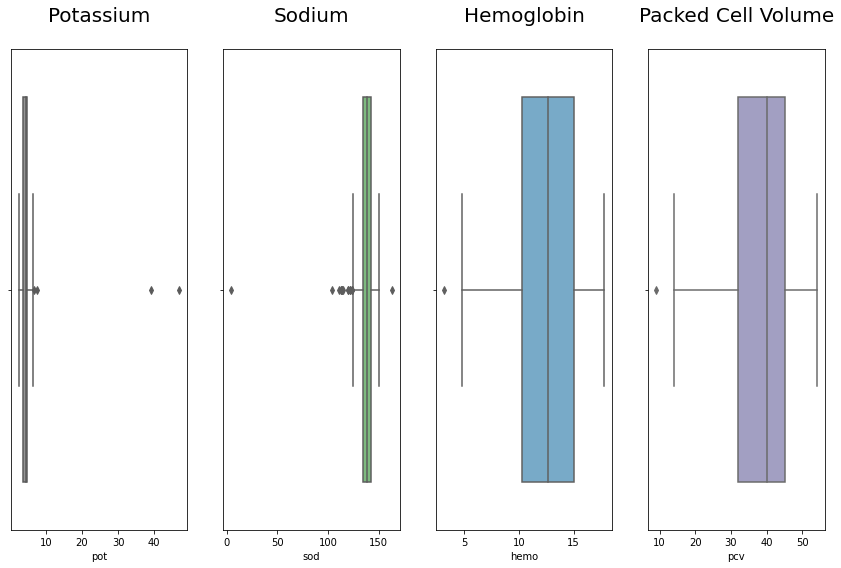

In [22]:
fig = plt.figure(figsize=(12,8))

plt.subplot(141)
sns.boxplot(df['pot'], orient='v', palette='Greys')
plt.title('Potassium\n', fontsize=20)

plt.subplot(142)
sns.boxplot(df['sod'], orient='v', palette='Greens')
plt.title('Sodium\n', fontsize=20)

plt.subplot(143)
sns.boxplot(df['hemo'], orient='v', palette='Blues')
plt.title('Hemoglobin\n', fontsize=20)

plt.subplot(144)
sns.boxplot(df['pcv'], orient='v', palette='Purples')
plt.title('Packed Cell Volume\n', fontsize=20)

plt.tight_layout()
plt.show()

13) ทำ Data Visualization อื่นๆ (แล้วแต่เลือก)

In [23]:
df13 = df.groupby('age').mean()
df13_2 = df.groupby('age').count()

In [24]:
import plotly.express as px

fig = px.line(df13_2, x=df13_2.index, y='classification',
             labels={'x':'Age','classification':'No. of patient'},
             title='No. of patient with CKD by Age')

fig.update_xaxes(range=[0, 100])
fig.show()

In [25]:
fig = px.box(df, x='classification', y='age')
fig.update_yaxes(range=[0, 100])
fig.update_layout(width=500,title_text='CKD diagnosis by Age')
fig.show()

In [26]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Stacked Subplots with Shared X-Axes

fig = make_subplots(rows=3, cols=2, shared_xaxes=True, 
                    vertical_spacing=0.02, horizontal_spacing=0.1)

fig.add_trace(go.Scatter(x=df13.index, y=df13['bgr'],
                    mode='lines', name='Blood Glucose Random'),
              row=1, col=1)
fig.add_trace(go.Scatter(x=df13.index, y=df13['bu'],
                    mode='lines', name='Blood Urea'),
              row=2, col=1)
fig.add_trace(go.Scatter(x=df13.index, y=df13['sc'],
                    mode='lines', name='Serum Creatinine'),
              row=3, col=1)
fig.add_trace(go.Scatter(x=df13.index, y=df13['sod'],
                    mode='lines', name='Sodium'),
              row=1, col=2)
fig.add_trace(go.Scatter(x=df13.index, y=df13['pot'],
                    mode='lines', name='Potassium'),
              row=2, col=2)
fig.add_trace(go.Scatter(x=df13.index, y=df13['hemo'],
                    mode='lines', name='Hemoglobin'),
              row=3, col=2)

# Update xaxis properties
fig.update_xaxes(title_text='Age', range=[0,100], row=3, col=1)
fig.update_xaxes(title_text='Age', range=[0,100], row=3, col=2)

# Update yaxis properties
fig.update_yaxes(title_text='bgr in mgs/dl', row=1, col=1)
fig.update_yaxes(title_text='bu in mgs/dl', row=2, col=1)
fig.update_yaxes(title_text='sc in mgs/dl', row=3, col=1)
fig.update_yaxes(title_text='sod in mEq/L', row=1, col=2)
fig.update_yaxes(title_text='pot in mEq/L', row=2, col=2)
fig.update_yaxes(title_text='hemo in gms', row=3, col=2)

fig.update_layout(height=800,
                  legend=dict(x=0,y=-0.5),
                  title_text='Avg. Lab Results by Age')
fig.show()

14) ทำ Data Cleaning โดยการลบ หรือ fill average ขึ้นอยู่กับความเหมาะสม

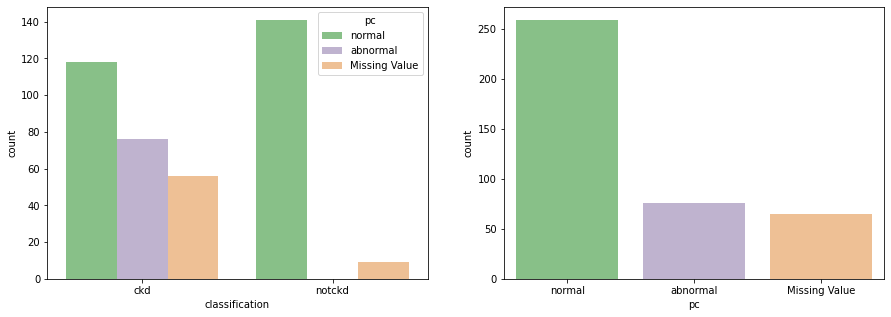

In [27]:
df_tmp = df.copy()
df_tmp['sg'] = df_tmp['sg'].fillna('Missing Value')
df_tmp['al'] = df_tmp['al'].fillna('Missing Value')
df_tmp['su'] = df_tmp['su'].fillna('Missing Value')
df_tmp['rbc'] = df_tmp['rbc'].fillna('Missing Value')
df_tmp['pc'] = df_tmp['pc'].fillna('Missing Value')
df_tmp['pcc'] = df_tmp['pcc'].fillna('Missing Value')
df_tmp['ba'] = df_tmp['ba'].fillna('Missing Value')

df_tmp['htn'] = df_tmp['htn'].fillna('Missing Value')
df_tmp['dm'] = df_tmp['dm'].fillna('Missing Value')
df_tmp['cad'] = df_tmp['cad'].fillna('Missing Value')
df_tmp['appet'] = df_tmp['appet'].fillna('Missing Value')
df_tmp['pe'] = df_tmp['pe'].fillna('Missing Value')
df_tmp['ane'] = df_tmp['ane'].fillna('Missing Value')
df_tmp['classification'] = df_tmp['classification'].fillna('Missing Value')

# vary feature here (used for continuous features)
test = 'pc'
fig = plt.figure(figsize=(15,5))
plt.subplot(121);sns.countplot(x='classification', hue=test,data=df_tmp, palette='Accent')
plt.subplot(122);sns.countplot(x=test,data=df_tmp, palette='Accent')
#plt.ylim([0,10])
try:
    print(df[test].mean())
except TypeError:
    pass

ก่อนทำ data cleaning

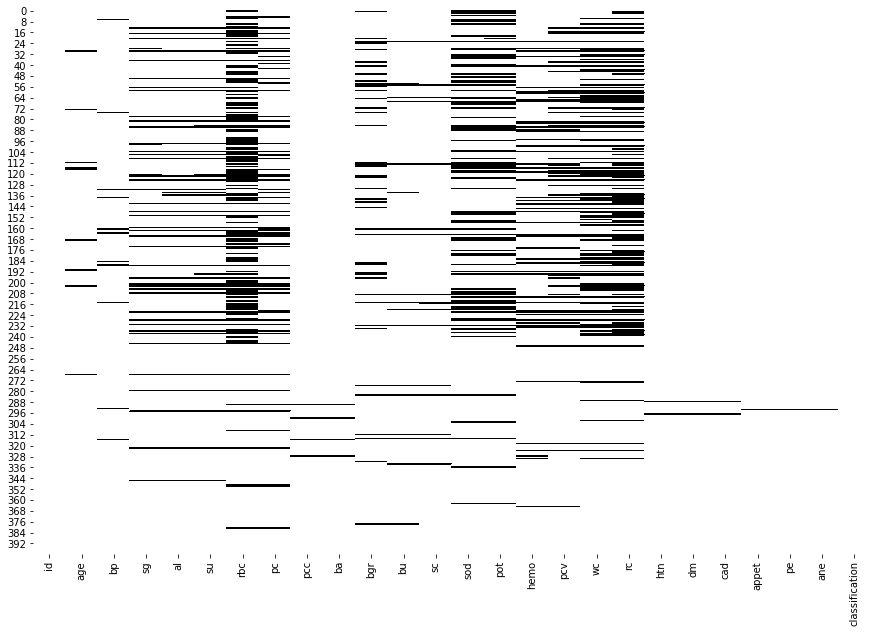

In [28]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), cbar=False, cmap='gray_r')

ทำ data cleaning

In [29]:
df['sg'].fillna(value=1.02, inplace=True)

df['al'].fillna(value=0.0, inplace=True)

df['su'].fillna(value=0.0, inplace=True)

df.drop('rbc', axis=1, inplace=True)

df['pc'].fillna(value='normal', inplace=True)

df['pcc'].fillna(value='notpresent', inplace=True)

df['ba'].fillna(value='notpresent', inplace=True)

df['htn'].fillna(value='no', inplace=True)

df['dm'].fillna(value='no', inplace=True)

df['cad'].fillna(value='no', inplace=True)

df['appet'].fillna(value='good', inplace=True)

df['pe'].fillna(value='no', inplace=True)

df['ane'].fillna(value='no', inplace=True)

df.drop(['age','bp'], axis=1, inplace=True);

df['bgr'].fillna(value=df['bgr'].mean(), inplace=True)

df['bu'].fillna(value=df['bu'].mean(), inplace=True)

df['sc'].fillna(value=df['sc'].mean(), inplace=True)


df['sod'].fillna(value=df['sod'].mean(), inplace=True)


df['pot'].fillna(value=df['pot'].mean(), inplace=True)


df['hemo'].fillna(value=df['hemo'].mean(), inplace=True)


df['pcv'].fillna(value=df['pcv'].mean(), inplace=True)

df.drop(['wc','rc'], axis=1, inplace=True)

df.drop('id', axis=1, inplace=True)

หลังทำ data cleaning

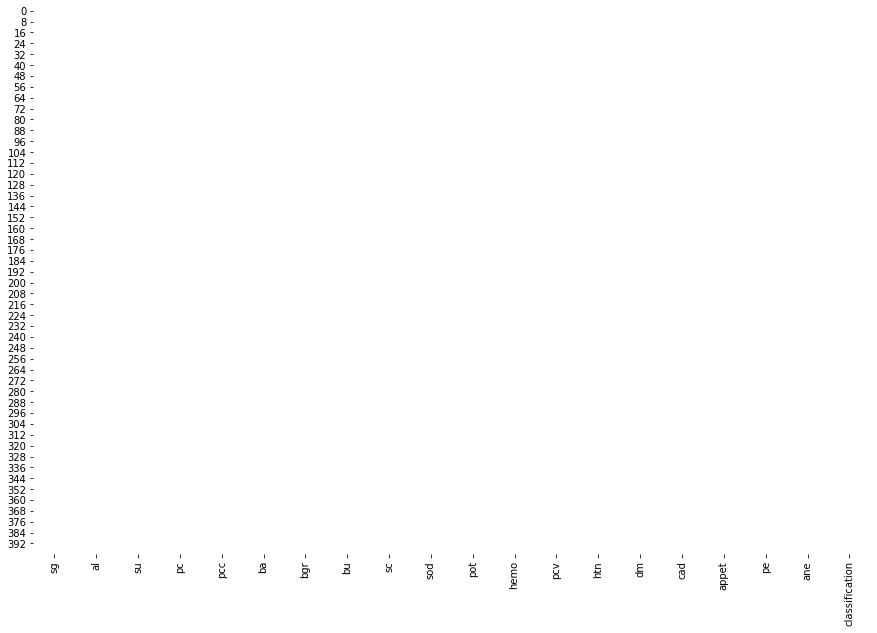

In [30]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), cbar=False, cmap='gray_r')

12)
สร้าง train/test split ของบ้าน สามารถลองทดสอบ 70:30, 80:20, 90:10 ratio ได้ตามใจชอบ

In [31]:
# ถ้าข้อมูลเป็น string ต้องสร้าง dummy variables ขึ้นมา
pc = pd.get_dummies(df['pc'], drop_first=True)
pcc = pd.get_dummies(df['pcc'], drop_first=True)
ba = pd.get_dummies(df['ba'], drop_first=True)
htn = pd.get_dummies(df['htn'], drop_first=True)
dm = pd.get_dummies(df['dm'], drop_first=True)
cad = pd.get_dummies(df['cad'], drop_first=True)
appet = pd.get_dummies(df['appet'], drop_first=True)
pe = pd.get_dummies(df['pe'], drop_first=True)
ane = pd.get_dummies(df['ane'], drop_first=True)
classification = pd.get_dummies(df['classification'], drop_first=True)

# เปลี่ยนชื่อ column เพื่อให้ไม่งงในภายหลัง
pc.rename(columns={'normal':'pc_normal'}, inplace=True)
pcc.rename(columns={'present':'pcc_present'}, inplace=True)
ba.rename(columns={'present':'ba_present'}, inplace=True)
htn.rename(columns={'yes':'htn_yes'}, inplace=True)
dm.rename(columns={'yes':'dm_yes'}, inplace=True)
cad.rename(columns={'yes':'cad_yes'}, inplace=True)
appet.rename(columns={'poor':'appet_poor'}, inplace=True)
pe.rename(columns={'yes':'pe_yes'}, inplace=True)
ane.rename(columns={'yes':'ane_yes'}, inplace=True)

# add dummies เข้าไปใน Data Frame ของเรา
df = pd.concat([df,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification],axis=1)

# ลบอันเก่าออก
df.drop(['pc','pcc','ba','htn','dm','cad','appet','pe','ane','classification'],axis=1,inplace=True)

# จะได้ Data Frame ที่พร้อมสร้าง Machine Learning Model
df.sample(5).T

,37,344,371,150,298
sg,1.02,1.02,1.025,1.025000,1.02
al,0.00,0.00,0.000,3.000000,0.00
su,0.00,0.00,0.000,0.000000,0.00
bgr,137.00,106.00,79.000,78.000000,91.00
bu,65.00,27.00,50.000,27.000000,49.00
sc,3.40,0.70,0.500,0.900000,1.20
sod,141.00,150.00,145.000,137.528754,135.00
pot,4.70,3.30,5.000,4.627244,4.50
hemo,9.70,14.40,17.600,12.300000,13.50
pcv,28.00,42.00,51.000,41.000000,48.00


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# drop เฉลยออก
X = df.drop(['notckd'], axis=1)

# y เป็นเฉลย
y = df['notckd']

In [33]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

15)
เลือก features ที่สนใจนำมาเทรน และ เลือก features ทั้งหมด

In [34]:
# 1) แบบเลือก features ทั้งหมด
# training
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
# 2) แบบเลือก features ที่สนใจ
# เลือกแค่ที่เป็น Categorical features มาเทรน
# เหตุผลไม่มี แค่อยากให้มีตัวเทียบกับแบบเลือก feature ทั้งหมด
X_train_some = X_train.drop(['bgr','bu','sc','sod','pot','hemo','pcv'], axis=1)
X_test_some = X_test.drop(['bgr','bu','sc','sod','pot','hemo','pcv'], axis=1)

# training
logistic_regression_some = LogisticRegression()
logistic_regression_some.fit(X_train_some,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# prediction
predicted = logistic_regression.predict(X_test)

# prediction
predicted_some = logistic_regression_some.predict(X_test_some)

In [37]:
print(predicted)
print(predicted_some)

[0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0]
[0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0
 0 1 0 0 1 0]


16)
วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision แล้วดูว่าแบบ features ที่เราเลือกมา กับ แบบเลือกทุก features แบบใดให้ผลลัพธ์ที่ดีกว่า

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# evaluation
print('*All features* modelling\n',confusion_matrix(y_test, predicted))
print('\n*Some features* modelling\n',confusion_matrix(y_test, predicted_some))
print('\nKeys:\n\n[     TRUE NEG.                 FALSE POS.        ]\n\
 (CKD and Correct)      (notCKD but actual is CKD)  \n\n\
[     FALSE NEG.                 TRUE POS.         ]\n\
 (CKD but actual is notCKD)   (notCKD and Correct)')

*All features* modelling
 [[51  0]
 [ 2 27]]

*Some features* modelling
 [[49  2]
 [ 0 29]]

Keys:

[     TRUE NEG.                 FALSE POS.        ]
 (CKD and Correct)      (notCKD but actual is CKD)  

[     FALSE NEG.                 TRUE POS.         ]
 (CKD but actual is notCKD)   (notCKD and Correct)


In [39]:
# all features
print('*All features* modelling')
print('> Accuracy =', accuracy_score(y_test, predicted))
print('> F1-Score =', f1_score(y_test, predicted))
print('> Precision =', precision_score(y_test, predicted))
print('> Recall =', recall_score(y_test, predicted))

# some features
print('\n*Some features* modelling')
print('> Accuracy =', accuracy_score(y_test, predicted_some))
print('> F1-Score =', f1_score(y_test, predicted_some))
print('> Precision =', precision_score(y_test, predicted_some))
print('> Recall =', recall_score(y_test, predicted_some))

*All features* modelling
> Accuracy = 0.975
> F1-Score = 0.9642857142857143
> Precision = 1.0
> Recall = 0.9310344827586207

*Some features* modelling
> Accuracy = 0.975
> F1-Score = 0.9666666666666666
> Precision = 0.9354838709677419
> Recall = 1.0


17)
ทำ Standardize ข้อมูล features ทั้งหมดก่อนเทรนโมเดล

In [40]:
# Data Transformation

X_sg = np.array(df['sg']).reshape(-1,1)
X_al = np.array(df['al']).reshape(-1,1)
X_su = np.array(df['su']).reshape(-1,1)
X_bgr = np.array(df['bgr']).reshape(-1,1)
X_bu = np.array(df['bu']).reshape(-1,1)

X_sc = np.array(df['sc']).reshape(-1,1)
X_sod = np.array(df['sod']).reshape(-1,1)
X_pot = np.array(df['pot']).reshape(-1,1)
X_hemo = np.array(df['hemo']).reshape(-1,1)
X_pcv = np.array(df['pcv']).reshape(-1,1)

X_pc_normal = np.array(df['pc_normal']).reshape(-1,1)
X_pcc_present = np.array(df['pcc_present']).reshape(-1,1)
X_ba_present = np.array(df['ba_present']).reshape(-1,1)
X_htn_yes = np.array(df['htn_yes']).reshape(-1,1)
X_dm_yes = np.array(df['dm_yes']).reshape(-1,1)

X_cad_yes = np.array(df['cad_yes']).reshape(-1,1)
X_appet_poor = np.array(df['appet_poor']).reshape(-1,1)
X_pe_yes = np.array(df['pe_yes']).reshape(-1,1)
X_ane_yes = np.array(df['ane_yes']).reshape(-1,1)

In [41]:
# Standardisation
from sklearn.preprocessing import StandardScaler

sc_X_sg = StandardScaler()
sc_X_al = StandardScaler()
sc_X_su = StandardScaler()
sc_X_bgr = StandardScaler()
sc_X_bu = StandardScaler()

sc_X_sc = StandardScaler()
sc_X_sod = StandardScaler()
sc_X_pot = StandardScaler()
sc_X_hemo = StandardScaler()
sc_X_pcv = StandardScaler()

sc_X_pc_normal = StandardScaler()
sc_X_pcc_present = StandardScaler()
sc_X_ba_present = StandardScaler()
sc_X_htn_yes = StandardScaler()
sc_X_dm_yes = StandardScaler()

sc_X_cad_yes = StandardScaler()
sc_X_appet_poor = StandardScaler()
sc_X_pe_yes = StandardScaler()
sc_X_ane_yes = StandardScaler()
#sc_y = StandardScaler()

X_sg = sc_X_sg.fit_transform(X_sg)
X_al = sc_X_al.fit_transform(X_al)
X_su = sc_X_su.fit_transform(X_su)
X_bgr = sc_X_bgr.fit_transform(X_bgr)
X_bu = sc_X_bu.fit_transform(X_bu)

X_sc = sc_X_sc.fit_transform(X_sc)
X_sod = sc_X_sod.fit_transform(X_sod)
X_pot = sc_X_pot.fit_transform(X_pot)
X_hemo = sc_X_hemo.fit_transform(X_hemo)
X_pcv = sc_X_pcv.fit_transform(X_pcv)

X_pc_normal = sc_X_pc_normal.fit_transform(X_pc_normal)
X_pcc_present = sc_X_pcc_present.fit_transform(X_pcc_present)
X_ba_present = sc_X_ba_present.fit_transform(X_ba_present)
X_htn_yes = sc_X_htn_yes.fit_transform(X_htn_yes)
X_dm_yes = sc_X_dm_yes.fit_transform(X_dm_yes)

X_cad_yes = sc_X_cad_yes.fit_transform(X_cad_yes)
X_appet_poor = sc_X_appet_poor.fit_transform(X_appet_poor)
X_pe_yes = sc_X_pe_yes.fit_transform(X_pe_yes)
X_ane_yes = sc_X_ane_yes.fit_transform(X_ane_yes)

# y_std = sc_y.fit_transform(y)
# do not do this because...
# the Y variable must be the classification class

In [42]:
# appending an array
arr = X_sg
arr = np.append(arr, X_al, axis=1)
arr = np.append(arr, X_su, axis=1)
arr = np.append(arr, X_bgr, axis=1)
arr = np.append(arr, X_bu, axis=1)

arr = np.append(arr, X_sc, axis=1)
arr = np.append(arr, X_sod, axis=1)
arr = np.append(arr, X_pot, axis=1)
arr = np.append(arr, X_hemo, axis=1)
arr = np.append(arr, X_pcv, axis=1)

arr = np.append(arr, X_pc_normal, axis=1)
arr = np.append(arr, X_pcc_present, axis=1)
arr = np.append(arr, X_ba_present, axis=1)
arr = np.append(arr, X_htn_yes, axis=1)
arr = np.append(arr, X_dm_yes, axis=1)

arr = np.append(arr, X_cad_yes, axis=1)
arr = np.append(arr, X_appet_poor, axis=1)
arr = np.append(arr, X_pe_yes, axis=1)
arr = np.append(arr, X_ane_yes, axis=1)

# creating DataFrame from 19 features
X_std = pd.DataFrame({'sg':arr[:,0], 'al':arr[:,1], 'su':arr[:,2],
                 'bgr':arr[:,3], 'bu':arr[:,4], 'sc':arr[:,5],
                 'sod':arr[:,6], 'pot':arr[:,7], 'hemo':arr[:,8],
                 'pcv':arr[:,9], 'pc_normal':arr[:,10], 'pcc_present':arr[:,11],
                 'ba_present':arr[:,12], 'htn_yes':arr[:,13], 'dm_yes':arr[:,14],
                 'cad_yes':arr[:,15], 'appet_poor':arr[:,16], 'pe_yes':arr[:,17],
                 'ane_yes':arr[:,18]})

In [43]:

X_std

,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,0.421486,0.076249,-0.380269,-0.361987,-0.435268,-0.333743,0.000000,6.307513e-16,1.059271,0.628372,0.484322,-0.342518,-0.241249,1.311903,1.385535,-0.304789,-0.507801,-0.484322,-0.420084
1,0.421486,2.363728,-0.380269,0.000000,-0.800941,-0.405039,0.000000,6.307513e-16,-0.452097,-0.108649,0.484322,-0.342518,-0.241249,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084
2,-1.421074,0.838742,2.507853,3.681441,-0.089909,-0.226800,0.000000,6.307513e-16,-1.078762,-0.968506,0.484322,-0.342518,-0.241249,-0.762252,1.385535,-0.304789,1.969276,-0.484322,2.380476
3,-2.342354,2.363728,-0.380269,-0.415543,-0.028964,0.129677,-2.885831,-7.553446e-01,-0.488960,-0.845669,-2.064742,2.919556,-0.241249,1.311903,-0.721743,-0.304789,1.969276,2.064742,2.380476
4,-1.421074,0.838742,-0.380269,-0.562820,-0.638420,-0.298096,0.000000,6.307513e-16,-0.341509,-0.477159,0.484322,-0.342518,-0.241249,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.421486,-0.686244,-0.380269,-0.107600,-0.171170,-0.458510,1.356638,9.685073e-02,1.169859,0.996882,0.484322,-0.342518,-0.241249,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084
396,1.342766,-0.686244,-0.380269,-0.977874,-0.536844,-0.333743,0.377606,-4.002632e-01,1.464760,1.856739,0.484322,-0.342518,-0.241249,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084
397,0.421486,-0.686244,-0.380269,-0.643153,-0.638420,-0.440686,-0.057519,-8.068997e-02,1.206722,1.242555,0.484322,-0.342518,-0.241249,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084
398,1.342766,-0.686244,-0.380269,-0.455709,-0.150855,-0.369391,-0.275081,9.685073e-02,0.616920,1.488229,0.484322,-0.342518,-0.241249,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084


In [44]:
# Split
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y, test_size=0.2, random_state=100)

# training
logistic_regression_std = LogisticRegression()
logistic_regression_std.fit(X_train_std,y_train_std)

# prediction
predicted_std = logistic_regression_std.predict(X_test_std)
predicted_std

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=uint8)

18)
วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision แล้วดูว่าแบบไม่ standardize กับ แบบ standardize แบบใดให้ผลลัพธ์ดีกว่า

In [45]:
# evaluation
print('*All features* (standardised) modelling\n',confusion_matrix(y_test_std, predicted_std))
print('\nKeys:\n\n[     TRUE NEG.                 FALSE POS.        ]\n\
 (CKD and Correct)      (notCKD but actual is CKD)  \n\n\
[     FALSE NEG.                 TRUE POS.         ]\n\
 (CKD but actual is notCKD)   (notCKD and Correct)')

*All features* (standardised) modelling
 [[51  0]
 [ 0 29]]

Keys:

[     TRUE NEG.                 FALSE POS.        ]
 (CKD and Correct)      (notCKD but actual is CKD)  

[     FALSE NEG.                 TRUE POS.         ]
 (CKD but actual is notCKD)   (notCKD and Correct)


In [46]:
# w/ standardisation
print('W/ standardisation')
print('> Accuracy =', accuracy_score(y_test_std, predicted_std))
print('> F1-Score =', f1_score(y_test_std, predicted_std))
print('> Precision =', precision_score(y_test_std, predicted_std))
print('> Recall =', recall_score(y_test_std, predicted_std))

# w/o standardisation
print('\nW/O standardisation')
print('> Accuracy =', accuracy_score(y_test, predicted))
print('> F1-Score =', f1_score(y_test, predicted))
print('> Precision =', precision_score(y_test, predicted))
print('> Recall =', recall_score(y_test, predicted))

W/ standardisation
> Accuracy = 1.0
> F1-Score = 1.0
> Precision = 1.0
> Recall = 1.0

W/O standardisation
> Accuracy = 0.975
> F1-Score = 0.9642857142857143
> Precision = 1.0
> Recall = 0.9310344827586207


19)
เลือก features ที่สนใจ และทำ standardization, เทรนโมเดล, วัดผล และเปรียบเทียบกับข้อ 18 (ข้อ 18 คือเลือกทุก features)

In [47]:
# เลือกแบบข้อ 15.2 คือ เอาแค่ที่เป็น Categorical features มาเทรน
# คัด features ที่ได้จากการ split ที่ข้อ 17 ทิ้ง ก่อนเอาไปเทรน
X_train_std_some = X_train_std.drop(['bgr','bu','sc','sod','pot','hemo','pcv'], axis=1)
X_test_std_some = X_test_std.drop(['bgr','bu','sc','sod','pot','hemo','pcv'], axis=1)

In [48]:
# training
logistic_regression_std = LogisticRegression()
logistic_regression_std.fit(X_train_std_some,y_train_std)

# prediction
predicted_std_some = logistic_regression_std.predict(X_test_std_some)
predicted_std_some

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=uint8)

In [49]:
# evaluation
print('*Some features* (standardised) modelling\n',confusion_matrix(y_test_std, predicted_std_some))
print('\nKeys:\n\n[     TRUE NEG.                 FALSE POS.        ]\n\
 (CKD and Correct)      (notCKD but actual is CKD)  \n\n\
[     FALSE NEG.                 TRUE POS.         ]\n\
 (CKD but actual is notCKD)   (notCKD and Correct)')

*Some features* (standardised) modelling
 [[50  1]
 [ 0 29]]

Keys:

[     TRUE NEG.                 FALSE POS.        ]
 (CKD and Correct)      (notCKD but actual is CKD)  

[     FALSE NEG.                 TRUE POS.         ]
 (CKD but actual is notCKD)   (notCKD and Correct)


In [50]:
# all features (standardised)
print('*All features* (standardised) modelling')
print('> Accuracy =', accuracy_score(y_test_std, predicted_std))
print('> F1-Score =', f1_score(y_test_std, predicted_std))
print('> Precision =', precision_score(y_test_std, predicted_std))
print('> Recall =', recall_score(y_test_std, predicted_std))

# some features (standardised)
print('\n*Some features* (standardised) modelling')
print('> Accuracy =', accuracy_score(y_test_std, predicted_std_some))
print('> F1-Score =', f1_score(y_test_std, predicted_std_some))
print('> Precision =', precision_score(y_test_std, predicted_std_some))
print('> Recall =', recall_score(y_test_std, predicted_std_some))

*All features* (standardised) modelling
> Accuracy = 1.0
> F1-Score = 1.0
> Precision = 1.0
> Recall = 1.0

*Some features* (standardised) modelling
> Accuracy = 0.9875
> F1-Score = 0.983050847457627
> Precision = 0.9666666666666667
> Recall = 1.0


20)
สิ่งที่สำคัญที่สุดในการทำ Machine Learning คือ ความคิดสร้างสรรค์
ดังนั้น ลองทำวิธีใดก็ได้ตามที่สอนมาทั้งหมด เพื่อให้สุดท้ายได้ผลลัพธ์ accuracy, F1 Score มากที่สุดที่ทำได้

In [51]:
# เอาจากข้อ 12 มา split ใหม่เป็น 90:10
X_train_mytry, X_test_mytry, y_train_mytry, y_test_mytry = train_test_split(X, y, test_size=0.1, random_state=100)

# training ปรับ max_iter=10000, ลอง solver หลายๆตัวมาแล้ว
logistic_regression_mytry = LogisticRegression(max_iter=10000, solver='saga')
logistic_regression_mytry.fit(X_train_mytry,y_train_mytry)

# prediction
predicted_mytry = logistic_regression.predict(X_test_mytry)

# evaluation
print('*My try* modelling\n',confusion_matrix(y_test_mytry, predicted_mytry))
print('\nKeys:\n[     TRUE NEG.                 FALSE POS.        ]\n\
 (CKD and Correct)      (notCKD but actual is CKD)  \n\n\
[     FALSE NEG.                 TRUE POS.         ]\n\
 (CKD but actual is notCKD)   (notCKD and Correct)')
print('\n*My try* modelling')
print('> Accuracy =', accuracy_score(y_test_mytry, predicted_mytry))
print('> F1-Score =', f1_score(y_test_mytry, predicted_mytry))
print('> Precision =', precision_score(y_test_mytry, predicted_mytry))
print('> Recall =', recall_score(y_test_mytry, predicted_mytry))

*My try* modelling
 [[26  0]
 [ 1 13]]

Keys:
[     TRUE NEG.                 FALSE POS.        ]
 (CKD and Correct)      (notCKD but actual is CKD)  

[     FALSE NEG.                 TRUE POS.         ]
 (CKD but actual is notCKD)   (notCKD and Correct)

*My try* modelling
> Accuracy = 0.975
> F1-Score = 0.962962962962963
> Precision = 1.0
> Recall = 0.9285714285714286
